# Importing Dataset

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
import pickle
from sklearn import preprocessing

C:\Users\Tru Projects\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing Dataset

In [2]:
data = pd.read_csv("ev_data.csv" , encoding= 'unicode_escape')

# EDA

In [3]:
data.head()

,consumption(kWh/100km),model,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,Unnamed: 14,A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note
0,14.63,i-MiEV,i-MiEV,49,07.02.2019,176977,50.7,6.50,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,NaN,"Noch 6 Balken, 33km Reichweite, Mainova Ökostr..."
1,14.63,i-MiEV,i-MiEV,49,06.02.2019,176926,49.9,7.30,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-0.37,"Noch 5 Balken, 30km Reichweite, Mainova Ökostr..."
2,13.79,i-MiEV,i-MiEV,49,05.02.2019,176876,51.5,7.10,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-1.21,"Noch 6B, 36km RRW, Batterie 8-11°C, 9,3°C, 41,..."
3,14.10,i-MiEV,i-MiEV,49,04.02.2019,176824,52.5,7.40,Electricity,Winter tires,1,0,1,Normal,NaN,0,0,NaN,-0.90,"Noch 5 Balken, 30km Reichweite, Mainova Ökostr..."
4,14.47,i-MiEV,i-MiEV,49,03.02.2019,176772,0.5,1.65,Electricity,Winter tires,1,0,0,Normal,NaN,0,0,NaN,-0.53,"Noch 15 Balken, 75km Reichweite, 85,5%, Batter..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   consumption(kWh/100km)  1236 non-null   float64
 1   model                   1285 non-null   object 
 2   version                 1285 non-null   object 
 3   power(kW)               1285 non-null   int64  
 4   fuel_date               1285 non-null   object 
 5   odometer                1285 non-null   int64  
 6   trip_distance(km)       1285 non-null   float64
 7   quantity(kWh)           1246 non-null   float64
 8   fuel_type               1285 non-null   object 
 9   tire_type               1285 non-null   object 
 10  city                    1285 non-null   int64  
 11  motor_way               1285 non-null   int64  
 12  country_roads           1285 non-null   int64  
 13  driving_style           1285 non-null   object 
 14  Unnamed: 14             0 non-null      

In [5]:
data = data.drop(['model','version','fuel_date','fuel_note','fuel_type','Unnamed: 14','avg_speed(km/h)'], axis =1)

In [6]:
data.head()

,consumption(kWh/100km),power(kW),odometer,trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating,ecr_deviation
0,14.63,49,176977,50.7,6.50,Winter tires,1,0,1,Normal,0,0,NaN
1,14.63,49,176926,49.9,7.30,Winter tires,1,0,1,Normal,0,0,-0.37
2,13.79,49,176876,51.5,7.10,Winter tires,1,0,1,Normal,0,0,-1.21
3,14.10,49,176824,52.5,7.40,Winter tires,1,0,1,Normal,0,0,-0.90
4,14.47,49,176772,0.5,1.65,Winter tires,1,0,0,Normal,0,0,-0.53


In [7]:
data.isnull().sum()

consumption(kWh/100km)    49
power(kW)                  0
odometer                   0
trip_distance(km)          0
quantity(kWh)             39
tire_type                  0
city                       0
motor_way                  0
country_roads              0
driving_style              0
A/C                        0
park_heating               0
ecr_deviation             51
dtype: int64

In [8]:
data['tire_type'].unique()

array(['Winter tires', 'Summer tires'], dtype=object)

In [9]:
data['driving_style'].unique()

array(['Normal', 'Fast', 'Moderate'], dtype=object)

In [10]:
label_encoder = preprocessing.LabelEncoder()

In [11]:
data['tire_type']= label_encoder.fit_transform(data['tire_type'])
data['driving_style']= label_encoder.fit_transform(data['driving_style'])

In [12]:
data

,consumption(kWh/100km),power(kW),odometer,trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating,ecr_deviation
0,14.63,49,176977,50.7,6.50,1,1,0,1,2,0,0,NaN
1,14.63,49,176926,49.9,7.30,1,1,0,1,2,0,0,-0.37
2,13.79,49,176876,51.5,7.10,1,1,0,1,2,0,0,-1.21
3,14.10,49,176824,52.5,7.40,1,1,0,1,2,0,0,-0.90
4,14.47,49,176772,0.5,1.65,1,1,0,0,2,0,0,-0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,11.96,49,115172,82.8,9.90,0,1,0,1,2,1,0,-3.04
1281,10.91,49,115089,12.4,5.68,0,1,0,1,2,0,0,-4.09
1282,10.91,49,115077,29.3,4.00,0,1,0,1,2,1,0,-4.09
1283,10.91,49,115048,95.2,5.25,0,0,1,1,2,1,0,-4.09


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   consumption(kWh/100km)  1236 non-null   float64
 1   power(kW)               1285 non-null   int64  
 2   odometer                1285 non-null   int64  
 3   trip_distance(km)       1285 non-null   float64
 4   quantity(kWh)           1246 non-null   float64
 5   tire_type               1285 non-null   int32  
 6   city                    1285 non-null   int64  
 7   motor_way               1285 non-null   int64  
 8   country_roads           1285 non-null   int64  
 9   driving_style           1285 non-null   int32  
 10  A/C                     1285 non-null   int64  
 11  park_heating            1285 non-null   int64  
 12  ecr_deviation           1234 non-null   float64
dtypes: float64(4), int32(2), int64(7)
memory usage: 120.6 KB


In [14]:
data.isnull().sum()

consumption(kWh/100km)    49
power(kW)                  0
odometer                   0
trip_distance(km)          0
quantity(kWh)             39
tire_type                  0
city                       0
motor_way                  0
country_roads              0
driving_style              0
A/C                        0
park_heating               0
ecr_deviation             51
dtype: int64

In [15]:
data.describe()

,consumption(kWh/100km),power(kW),odometer,trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating,ecr_deviation
count,1236.000000,1285.0,1285.000000,1285.000000,1246.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1234.000000
mean,12.612476,49.0,148212.354086,48.307549,6.042584,0.270817,0.770428,0.432685,0.868482,1.908949,0.059144,0.031907,-2.390665
std,1.501647,0.0,17678.496984,19.576849,2.352949,0.444555,0.420721,0.495641,0.338097,0.389051,0.235986,0.175820,1.500830
min,9.590000,49.0,114952.000000,0.200000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.410000
25%,11.490000,49.0,133332.000000,36.500000,4.347500,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,-3.510000
50%,12.210000,49.0,149003.000000,48.900000,6.065000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,-2.795000
75%,13.750000,49.0,163672.000000,58.000000,7.500000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,-1.252500
max,18.710000,49.0,176977.000000,154.900000,13.630000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.710000


In [16]:
data = data.dropna()

In [17]:
data.isnull().sum()

consumption(kWh/100km)    0
power(kW)                 0
odometer                  0
trip_distance(km)         0
quantity(kWh)             0
tire_type                 0
city                      0
motor_way                 0
country_roads             0
driving_style             0
A/C                       0
park_heating              0
ecr_deviation             0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 1 to 1284
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   consumption(kWh/100km)  1234 non-null   float64
 1   power(kW)               1234 non-null   int64  
 2   odometer                1234 non-null   int64  
 3   trip_distance(km)       1234 non-null   float64
 4   quantity(kWh)           1234 non-null   float64
 5   tire_type               1234 non-null   int32  
 6   city                    1234 non-null   int64  
 7   motor_way               1234 non-null   int64  
 8   country_roads           1234 non-null   int64  
 9   driving_style           1234 non-null   int32  
 10  A/C                     1234 non-null   int64  
 11  park_heating            1234 non-null   int64  
 12  ecr_deviation           1234 non-null   float64
dtypes: float64(4), int32(2), int64(7)
memory usage: 125.3 KB


# Data Visualization

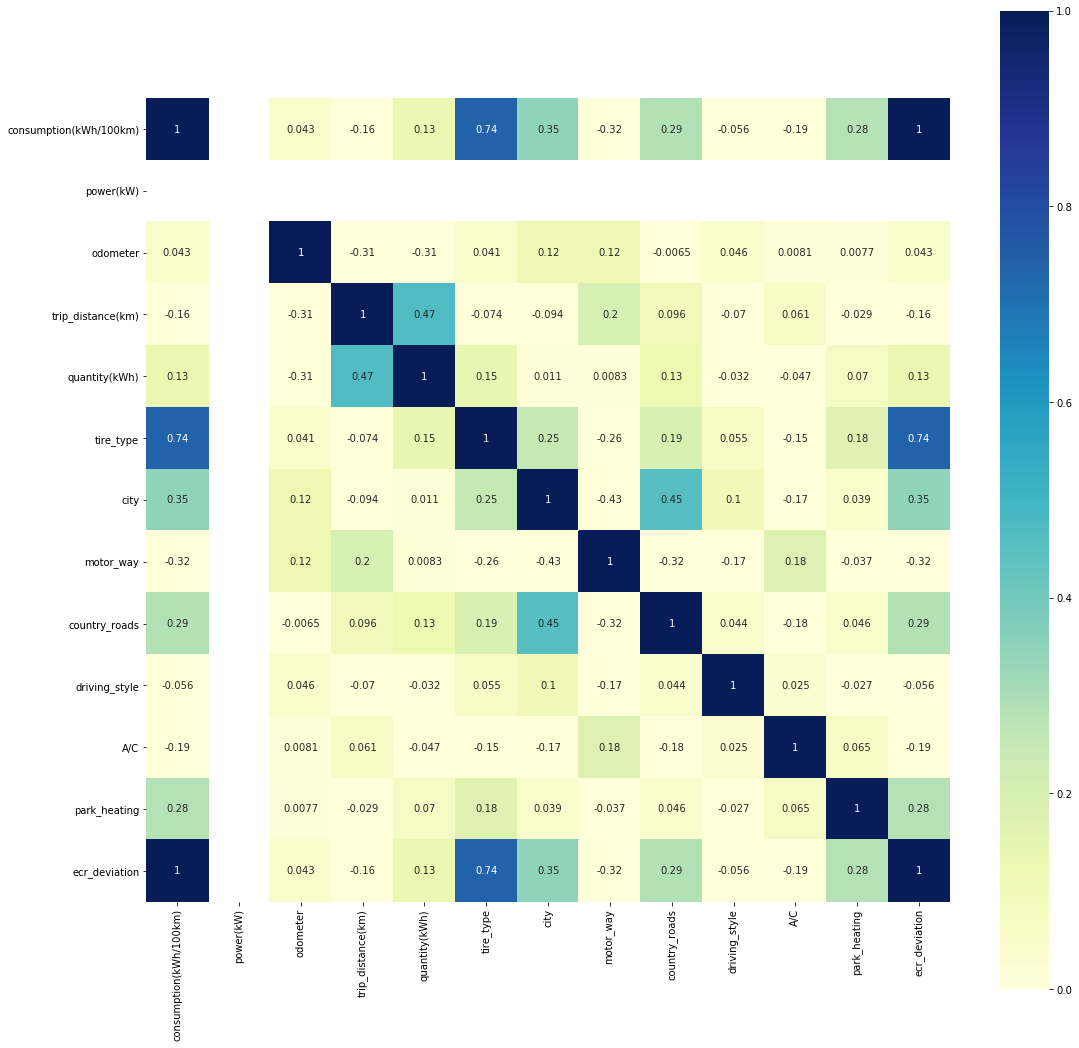

In [19]:
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,annot=True, square=True, vmin=0, vmax=1,cmap="YlGnBu");

# Model Building

In [20]:
print(data.corr()["consumption(kWh/100km)"].abs().sort_values(ascending=False))

ecr_deviation             1.000000
consumption(kWh/100km)    1.000000
tire_type                 0.740493
city                      0.348654
motor_way                 0.318905
country_roads             0.287462
park_heating              0.283602
A/C                       0.187570
trip_distance(km)         0.159303
quantity(kWh)             0.131623
driving_style             0.056321
odometer                  0.042972
power(kW)                      NaN
Name: consumption(kWh/100km), dtype: float64


In [21]:
X = data.drop(['power(kW)', 'consumption(kWh/100km)'], axis =1 )

In [22]:
y = data['consumption(kWh/100km)']

In [23]:
y = round(y)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=500)

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test)
val1 = (accuracy_score(y_test, predictions)*100)

In [26]:
val1

56.2753036437247

# LOGISTIC REGRESSION

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
val2 = (accuracy_score(y_test, predictions)*100)

In [28]:
val2

35.22267206477733

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predictions = DT.predict(x_test)
val3 = (accuracy_score(y_test, predictions)*100)

In [30]:
val3

100.0

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(x_train,y_train)
predictions = RF.predict(x_test)
val4 = (accuracy_score(y_test, predictions)*100)

In [32]:
val4

63.96761133603239

# SVM

In [33]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
predictions = svm.predict(x_test)
val5 = (accuracy_score(y_test, predictions)*100)

In [34]:
val5

35.22267206477733

# Ensemble

In [35]:
from sklearn.ensemble import VotingClassifier
estimator = [] 
estimator.append(('LR', LogisticRegression(random_state=0))) 
estimator.append(('DTC', DecisionTreeClassifier())) 
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(x_train, y_train)
predictions = vot_hard.predict(x_test)
val6 = (accuracy_score(y_test, predictions)*100)

In [36]:
val6

57.89473684210527

# Stacking Classifier

In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [39]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]

In [40]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [42]:
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
val7 = (accuracy_score(y_test, predictions)*100)

In [43]:
val7

5.263157894736842

# Accuracy Comparison

In [44]:
score = [val1,val2,val3,val4,val5,val6,val7]
classifier = ('KNN','Logistic Regression','Decision Tree','Random Forest','SVM','Ensemble','Stacking Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6]
[56.2753036437247, 35.22267206477733, 100.0, 63.96761133603239, 35.22267206477733, 57.89473684210527, 5.263157894736842]


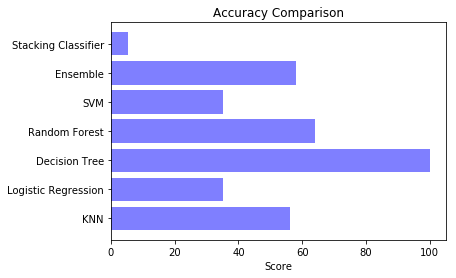

In [45]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

# Pickle

In [46]:
pickle.dump(DT, open('model.pkl', 'wb'))

In [47]:
s = np.array([174082,19,4,1,1,1,1,2,0,0,-2])
print(s.shape)
s = s.reshape(1,-1)
print(s.shape)

(11,)
(1, 11)


In [48]:
model = pickle.load(open('model.pkl', 'rb'))
print(model.predict(s))

[13.]
